#### We will be predicting if the house prices are above the median using keras.

###### We will be using the [Zillow’s Home Value Prediction Kaggle competition data](https://www.kaggle.com/c/zillow-prize-1/data) (with a few modifications) to create a model

##### Import the required libraries
<!-- Based on https://medium.freecodecamp.org/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159 -->

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


##### Read the csv data file and store in a dataframe

In [2]:
df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


##### Extract the values from the csv file and store it in 'dataset'

In [3]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

##### Store all the features that we would like our model to train on in 'X' <br/>
##### X stores all the rows and the first 9 columns of the dataset

In [4]:
X = dataset[:, 0:10]
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]], dtype=int64)

##### Store the result of the data in 'Y' <br/>
##### Y stores all the 10th column of the dataset (which is the result - if the house prices is greater than the median price)

In [5]:
Y = dataset[:, 10]
Y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

##### We perform normalization on the data <br/>
##### We scale the input features to values between 0 and 1 (inclusive)

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

D:\Users\Nachiket\Anaconda3\envs\intuitive-deep-learning\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

##### We need to split the data into following categories <br/>
- Training data 
- Test data 
- Validation data

##### The following tells scikit-learn that your val_and_test size will be 30% of the overall dataset. The code will store the split data into the first four variables on the left of the equal sign as the variable names suggest. <br/>
##### Since we have 1460 rows, 70% of 1460 (=1022 rows) will be the training model.<br/>
##### Similarly, 30% of 1460 (=438 rows) will be test <strong>and</strong> validation.

In [7]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

##### We need to break down validation and test data into seperate blocks. So we repeat the above method, such that test data and validation data are both 50% of the allotted data. <br/>
##### Now test will be 50% of 438 (=219 rows) and validation also will be 219 rows.

In [8]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

The shapes of the above variables look as follows - 

In [9]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


##### We have now completed our preprocessing. <br/>
##### We have, 
- X_train (10 input features, 70% of full dataset)
- X_val (10 input features, 15% of full dataset)
- X_test (10 input features, 15% of full dataset)
- Y_train (1 label, 70% of full dataset)
- Y_val (1 label, 15% of full dataset)
- Y_test (1 label, 15% of full dataset)

We now create a network with the architecture as shown below - <br/>
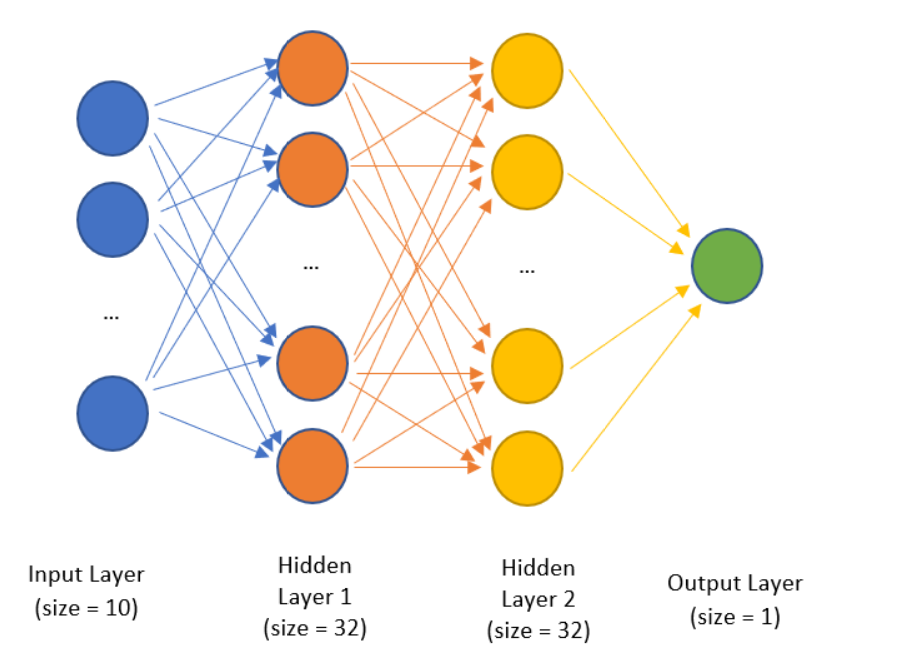

In [10]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
hist = model.fit(X_train, Y_train,
          batch_size=16, epochs=124,
          validation_data=(X_val, Y_val))

Instructions for updating:
Use tf.cast instead.
Train on 1022 samples, validate on 219 samples
Epoch 1/124
1022/1022 [==============================] - 0s 398us/step - loss: 0.6849 - acc: 0.6438 - val_loss: 0.6790 - val_acc: 0.7032
Epoch 2/124
1022/1022 [==============================] - 0s 58us/step - loss: 0.6770 - acc: 0.6898 - val_loss: 0.6715 - val_acc: 0.7260
Epoch 3/124
1022/1022 [==============================] - 0s 61us/step - loss: 0.6690 - acc: 0.7417 - val_loss: 0.6630 - val_acc: 0.7397
Epoch 4/124
1022/1022 [==============================] - 0s 60us/step - loss: 0.6592 - acc: 0.7661 - val_loss: 0.6538 - val_acc: 0.7671
Epoch 5/124
1022/1022 [==============================] - 0s 57us/step - loss: 0.6487 - acc: 0.7857 - val_loss: 0.6445 - val_acc: 0.7945
Epoch 6/124
1022/1022 [==============================] - 0s 58us/step - loss: 0.6387 - acc: 0.8082 - val_loss: 0.6348 - val_acc: 0.7808
Epoch 7/124
1022/1022 [==============================] - 0s 61us/step - loss: 0.6281 - a

1022/1022 [==============================] - 0s 61us/step - loss: 0.2539 - acc: 0.9022 - val_loss: 0.2910 - val_acc: 0.8813
Epoch 59/124
1022/1022 [==============================] - 0s 61us/step - loss: 0.2504 - acc: 0.9002 - val_loss: 0.2962 - val_acc: 0.8767
Epoch 60/124
1022/1022 [==============================] - 0s 59us/step - loss: 0.2531 - acc: 0.8963 - val_loss: 0.2891 - val_acc: 0.8813
Epoch 61/124
1022/1022 [==============================] - 0s 59us/step - loss: 0.2505 - acc: 0.8992 - val_loss: 0.2920 - val_acc: 0.8721
Epoch 62/124
1022/1022 [==============================] - 0s 59us/step - loss: 0.2498 - acc: 0.8943 - val_loss: 0.2865 - val_acc: 0.8813
Epoch 63/124
1022/1022 [==============================] - 0s 58us/step - loss: 0.2493 - acc: 0.9012 - val_loss: 0.2856 - val_acc: 0.8858
Epoch 64/124
1022/1022 [==============================] - 0s 60us/step - loss: 0.2489 - acc: 0.9031 - val_loss: 0.2844 - val_acc: 0.8813
Epoch 65/124
1022/1022 [==============================

Epoch 118/124
1022/1022 [==============================] - 0s 56us/step - loss: 0.2267 - acc: 0.9070 - val_loss: 0.2547 - val_acc: 0.8995
Epoch 119/124
1022/1022 [==============================] - 0s 56us/step - loss: 0.2265 - acc: 0.9061 - val_loss: 0.2567 - val_acc: 0.8858
Epoch 120/124
1022/1022 [==============================] - 0s 56us/step - loss: 0.2278 - acc: 0.9031 - val_loss: 0.2546 - val_acc: 0.8904
Epoch 121/124
1022/1022 [==============================] - 0s 54us/step - loss: 0.2260 - acc: 0.9070 - val_loss: 0.2536 - val_acc: 0.8950
Epoch 122/124
1022/1022 [==============================] - 0s 55us/step - loss: 0.2245 - acc: 0.9051 - val_loss: 0.2560 - val_acc: 0.9041
Epoch 123/124
1022/1022 [==============================] - 0s 55us/step - loss: 0.2257 - acc: 0.9041 - val_loss: 0.2650 - val_acc: 0.8904
Epoch 124/124
1022/1022 [==============================] - 0s 56us/step - loss: 0.2238 - acc: 0.9061 - val_loss: 0.2525 - val_acc: 0.8904


In [12]:
loss, accuracy = model.evaluate(X_test, Y_test)
accuracy

219/219 [==============================] - 0s 23us/step


0.8538812766336414

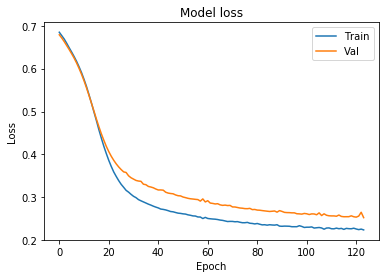

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

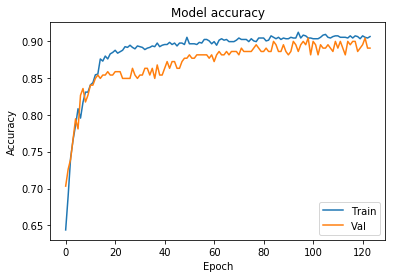

In [14]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()